In [ ]:
import random as rd
import sys
import time
import matplotlib.pyplot as plt
from tabulate import tabulate

sys.setrecursionlimit(15000)

arr = [] # initialise empty list

qs_c = qs_ex = ms_c = ms_ex = hs_c = hs_ex = 0


In [ ]:
def init(n,DEBUG):
  global arr
  arr = []
  for i in range(0,n):
     arr.append(rd.randint(0,n)) # assign random values to the empty list
    
  print(n, "Elements")
  if(DEBUG):
    print("Unsorted: ", arr)

In [ ]:
def swap(arr,a,b):
    # a,b => indexes in array
    try:
      temp = arr[b]
      arr[b] = arr[a]
      arr[a] = temp
    except:
      print(a,b)

    return

Quicksort Alogrithm

In [ ]:
def partition(qs_arr, start, end):
  pivot = qs_arr[end]
  p_index = start
  global qs_c 
  global qs_ex

  for i in range(start, end):
    qs_c = qs_c + 1
    if (qs_arr[i] <= pivot):
      qs_ex = qs_ex + 1
      swap(qs_arr, i, p_index)
      p_index = p_index + 1

  qs_ex = qs_ex + 1
  swap(qs_arr, end, p_index)

  return p_index

In [ ]:
def quicksort(qs_arr, start, end):

  if start < end:

    p_index = partition(qs_arr, start, end)

    quicksort(qs_arr, start, p_index - 1)
    quicksort(qs_arr, p_index + 1, end)

Mergesort Algorithm


In [ ]:
def split_and_merge(ms_arr):
  if len(ms_arr) > 1:
    central_index = int(len(ms_arr) / 2)

    # split and copy data in temp arrays
    L = ms_arr[:central_index] 
    R = ms_arr[central_index:]

    # split recurssively
    split_and_merge(L)
    split_and_merge(R)


    # then merge
    merge(L,R,ms_arr)

In [ ]:
def merge(L, R, ms_arr):

  i = j = k = 0

  global ms_c
  global ms_ex

  # Compare and replace
  while i < len(L) and j < len(R): 
    ms_c = ms_c + 1
    if L[i] < R[j]: 
      ms_ex = ms_ex + 1
      ms_arr[k] = L[i] 
      i+= 1
    else: 
      ms_ex = ms_ex + 1
      ms_arr[k] = R[j] 
      j+= 1
    k+= 1

  # Look for unchecked elements
  while i < len(L):
    ms_c = ms_c + 1 
    ms_arr[k] = L[i] 
    i+= 1
    k+= 1
      
  while j < len(R):
    ms_c = ms_c + 1 
    ms_arr[k] = R[j] 
    j+= 1
    k+= 1

Heapsort Algorithm

In [ ]:
def heapify(hs_arr, n, i): 
  largest = i # Initialize largest as root 
  l = 2 * i + 1     # left = 2*i + 1 
  r = 2 * i + 2     # right = 2*i + 2 

  global hs_c
  global hs_ex

  # See if left child of root exists and is 
  # greater than root 
  hs_c = hs_c + 1
  if l < n and hs_arr[i] < hs_arr[l]:
    largest = l 

  # See if right child of root exists and is 
  # greater than root 
  hs_c = hs_c + 1
  if r < n and hs_arr[largest] < hs_arr[r]:
    largest = r 

  # Change root, if needed 
  hs_c = hs_c + 1
  if largest != i:
    hs_ex = hs_ex + 1
    hs_arr[i],hs_arr[largest] = hs_arr[largest],hs_arr[i] # swap 

    # Heapify the root. 
    heapify(hs_arr, n, largest) 

In [ ]:
# The main function to sort an array of given size 
def heapSort(hs_arr): 
  n = len(hs_arr)
  global hs_c
  global hs_ex 
  
  # Build a maxheap. 
  for i in range(n//2 - 1, -1, -1): 
    heapify(hs_arr, n, i) 

  # One by one extract elements 
  for i in range(n-1, 0, -1): 
    hs_ex = hs_ex + 1
    hs_arr[i], hs_arr[0] = hs_arr[0], hs_arr[i] # swap 
    heapify(hs_arr, i, 0) 

Driver

In [ ]:
def main(n, DEBUG):

  init(n, DEBUG)
  qs_arr = arr
  ms_arr = arr
  hs_arr = arr

  global qs_c
  global qs_ex 
  qs_c = 0
  qs_ex = 0
  qs_start_time = time.clock() # capture processor time 
  quicksort(qs_arr, 0, len(qs_arr) - 1)
  qs_time_elapsed = time.clock() - qs_start_time

  global ms_c
  global ms_ex 
  ms_c = 0
  ms_ex = 0
  ms_start_time = time.clock() # capture processor time 
  split_and_merge(ms_arr)
  ms_time_elapsed = time.clock() - ms_start_time

  global hs_c
  global hs_ex 
  hs_c = 0
  hs_ex = 0
  hs_start_time = time.clock() # capture processor time 
  heapSort(hs_arr)
  hs_time_elapsed = time.clock() - hs_start_time

  print("\nQuick Sort:")
  print("Time Elapsed for",n,"elements = ",qs_time_elapsed, " seconds")
  print("Comparisions: ", qs_c, "and Exchanges: ", qs_ex)
  if DEBUG:
    print("Sorted:", qs_arr)
  
  print("\nMerge Sort:")
  print("Time Elapsed for",n,"elements = ",ms_time_elapsed, " seconds")
  print("Comparisions: ", ms_c, "and Exchanges: ", ms_ex)
  if DEBUG:
    print("Sorted:", ms_arr)

  print("\nHeap Sort:")
  print("Time Elapsed for",n,"elements = ",hs_time_elapsed, " seconds")
  print("Comparisions: ", hs_c, "and Exchanges: ", hs_ex)
  if DEBUG:
    print("Sorted:", hs_arr)

  print("---------------------------------------------------------------------------------")

  return [qs_time_elapsed, ms_time_elapsed, hs_time_elapsed]

In [ ]:
n10 = main(10, True)
qs10 = n10[0]
ms10 = n10[1]
hs10 = n10[2]

qs10_c = qs_c
qs10_ex = qs_ex
ms10_c = ms_c
ms10_ex = ms_ex
hs10_c = hs_c
hs10_ex = hs_ex
############################
n100 = main(100, True)
qs100 = n100[0]
ms100 = n100[1]
hs100 = n100[2]

qs100_c = qs_c
qs100_ex = qs_ex
ms100_c = ms_c
ms100_ex = ms_ex
hs100_c = hs_c
hs100_ex = hs_ex
###########################
n1000 = main(1000, False)
qs1000 = n1000[0]
ms1000 = n1000[1]
hs1000 = n1000[2]

qs1000_c = qs_c
qs1000_ex = qs_ex
ms1000_c = ms_c
ms1000_ex = ms_ex
hs1000_c = hs_c
hs1000_ex = hs_ex
###########################
n10000 = main(10000, False)
qs10000 = n10000[0]
ms10000 = n10000[1]
hs10000 = n10000[2]

qs10000_c = qs_c
qs10000_ex = qs_ex
ms10000_c = ms_c
ms10000_ex = ms_ex
hs10000_c = hs_c
hs10000_ex = hs_ex

10 Elements
Unsorted:  [1, 8, 0, 10, 7, 2, 3, 6, 5, 6]

Quick Sort:
Time Elapsed for 10 elements =  5.600000000072214e-05  seconds
Comparisions:  23 and Exchanges:  25
Sorted: [0, 1, 2, 3, 5, 6, 6, 7, 8, 10]

Merge Sort:
Time Elapsed for 10 elements =  3.499999999689862e-05  seconds
Comparisions:  34 and Exchanges:  15
Sorted: [0, 1, 2, 3, 5, 6, 6, 7, 8, 10]

Heap Sort:
Time Elapsed for 10 elements =  2.600000001962144e-05  seconds
Comparisions:  108 and Exchanges:  31
Sorted: [0, 1, 2, 3, 5, 6, 6, 7, 8, 10]
---------------------------------------------------------------------------------
100 Elements
Unsorted:  [35, 85, 19, 85, 33, 92, 48, 27, 46, 91, 93, 17, 20, 96, 78, 97, 74, 49, 1, 27, 10, 41, 91, 49, 23, 20, 50, 48, 21, 13, 88, 99, 33, 1, 71, 92, 55, 26, 41, 10, 69, 35, 67, 1, 15, 31, 76, 32, 24, 98, 68, 6, 40, 13, 88, 38, 48, 39, 43, 14, 53, 74, 46, 66, 60, 3, 50, 24, 63, 62, 45, 44, 16, 24, 99, 78, 7, 88, 0, 35, 74, 80, 12, 25, 15, 61, 55, 59, 85, 32, 34, 44, 65, 11, 98, 10, 8,

In [ ]:
print('Time Elapsed\n')
data = [[10, qs10, ms10, hs10],
[100, qs100, ms100, hs100],
[1000, qs1000, ms1000, hs1000],
[10000, qs10000, ms10000, hs10000]] 
print (tabulate(data, headers=["n", "QuickSort", "MergeSort", "HeapSort"]), '\n')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('\nComparisions\n')
data = [[10, qs10_c, ms10_c, hs10_c],
[100, qs100_c, ms100_c, hs100_c],
[1000, qs1000_c, ms1000_c, hs1000_c],
[10000, qs10000_c, ms10000_c, hs10000_c]] 
print (tabulate(data, headers=["n", "QuickSort", "MergeSort", "HeapSort"]),"\n")
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('\nExchanges\n')
data = [[10, qs10_ex, ms10_ex, hs10_ex],
[100, qs100_ex, ms100_ex, hs100_ex],
[1000, qs1000_ex, ms1000_ex, hs1000_ex],
[10000, qs10000_ex, ms10000_ex, hs10000_ex]] 
print (tabulate(data, headers=["n", "QuickSort", "MergeSort", "HeapSort"]))

Time Elapsed

    n    QuickSort    MergeSort    HeapSort
-----  -----------  -----------  ----------
   10     5.6e-05      3.5e-05     2.6e-05
  100     0.00024      0.000307    0.000394
 1000     0.003154     0.004567    0.006992
10000     0.046188     0.055093    0.099693 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Comparisions

    n    QuickSort    MergeSort    HeapSort
-----  -----------  -----------  ----------
   10           23           34         108
  100          656          672        2049
 1000        10791         9976       30465
10000       168594       133616      408501 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Exchanges

    n    QuickSort    MergeSort    HeapSort
-----  -----------  -----------  ----------
   10           25           15          31
  100          432          339         633
 1000         6446         5120        9655
10000        85985        67198      131167


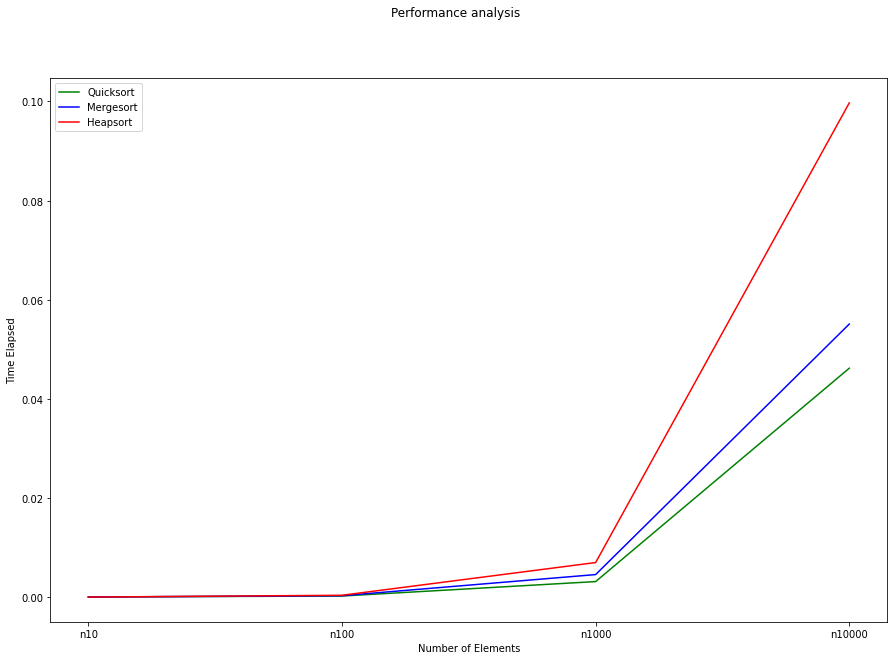

In [ ]:
names = ['n10', 'n100', 'n1000', 'n10000']

qs_names = ['qs10', 'qs100', 'qs1000', 'qs10000']
qs_values = [qs10, qs100, qs1000, qs10000]

ms_names = ['ms10', 'ms100', 'ms1000', 'ms10000']
ms_values = [ms10, ms100, ms1000, ms10000]

hs_names = ['hs10', 'hs100', 'hs1000', 'hs10000']
hs_values = [hs10, hs100, hs1000, hs10000]

plt.figure(figsize=(15, 10))

plt.subplot()
plt.plot(names, qs_values, 'g' ,label = 'Quicksort')
plt.plot(names, ms_values, 'b' ,label = 'Mergesort')
plt.plot(names, hs_values, 'r' ,label = 'Heapsort')

plt.suptitle('Performance analysis')
plt.xlabel('Number of Elements')
plt.ylabel('Time Elapsed')

plt.legend()
plt.show()

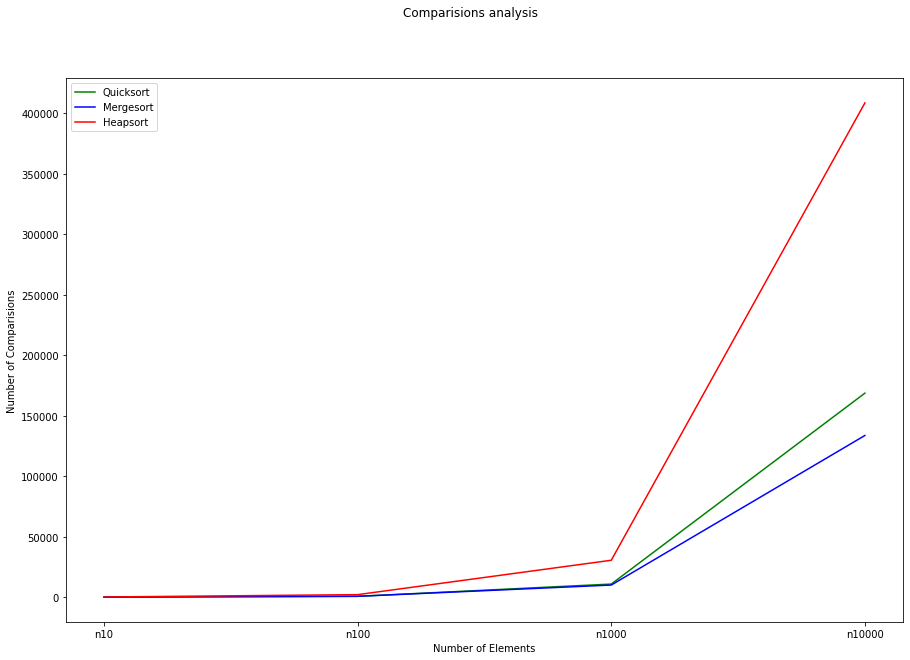

In [ ]:
names = ['n10', 'n100', 'n1000', 'n10000']
qs_c_values = [qs10_c, qs100_c, qs1000_c, qs10000_c]
ms_c_values = [ms10_c, ms100_c, ms1000_c, ms10000_c]
hs_c_values = [hs10_c, hs100_c, hs1000_c, hs10000_c]

plt.figure(figsize=(15, 10))

plt.subplot()
plt.plot(names, qs_c_values, 'g' ,label = 'Quicksort')
plt.plot(names, ms_c_values, 'b' ,label = 'Mergesort')
plt.plot(names, hs_c_values, 'r' ,label = 'Heapsort')

plt.suptitle('Comparisions analysis')
plt.xlabel('Number of Elements')
plt.ylabel('Number of Comparisions')

plt.legend()
plt.show()

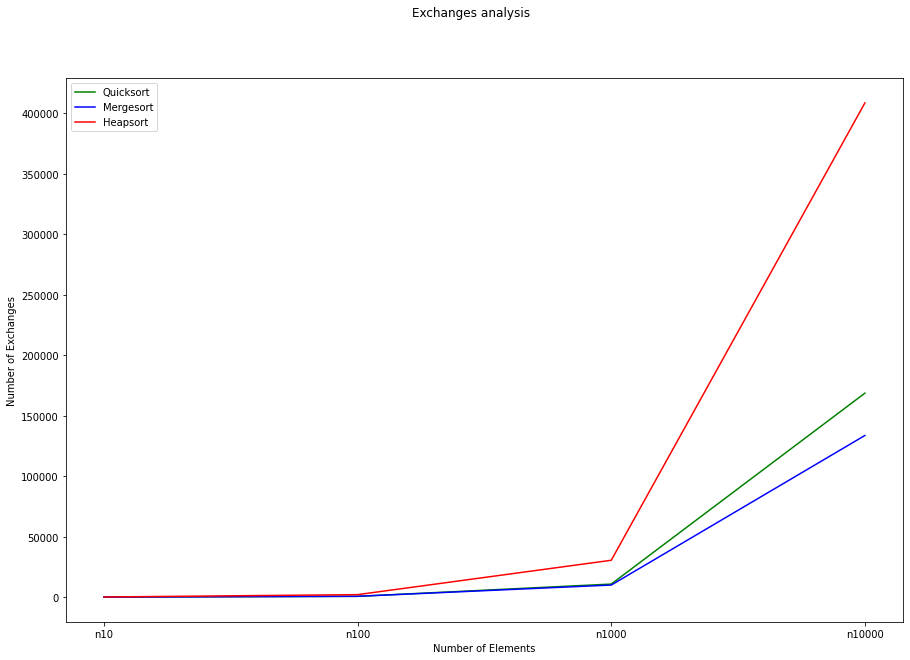

In [ ]:
names = ['n10', 'n100', 'n1000', 'n10000']
qs_ex_values = [qs10_ex, qs100_ex, qs1000_ex, qs10000_ex]
ms_ex_values = [ms10_ex, ms100_ex, ms1000_ex, ms10000_ex]
hs_ex_values = [hs10_ex, hs100_ex, hs1000_ex, hs10000_ex]

plt.figure(figsize=(15, 10))

plt.subplot()
plt.plot(names, qs_c_values, 'g' ,label = 'Quicksort')
plt.plot(names, ms_c_values, 'b' ,label = 'Mergesort')
plt.plot(names, hs_c_values, 'r' ,label = 'Heapsort')

plt.suptitle('Exchanges analysis')
plt.xlabel('Number of Elements')
plt.ylabel('Number of Exchanges')

plt.legend()
plt.show()